In [1]:
pip install xlrd


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Loading data...
Separating individual countries from aggregates...
Creating visualizations...


C:\Users\vishn\AppData\Local\Temp\ipykernel_15288\3456865320.py:93: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(x_labels, rotation=45, ha='right')


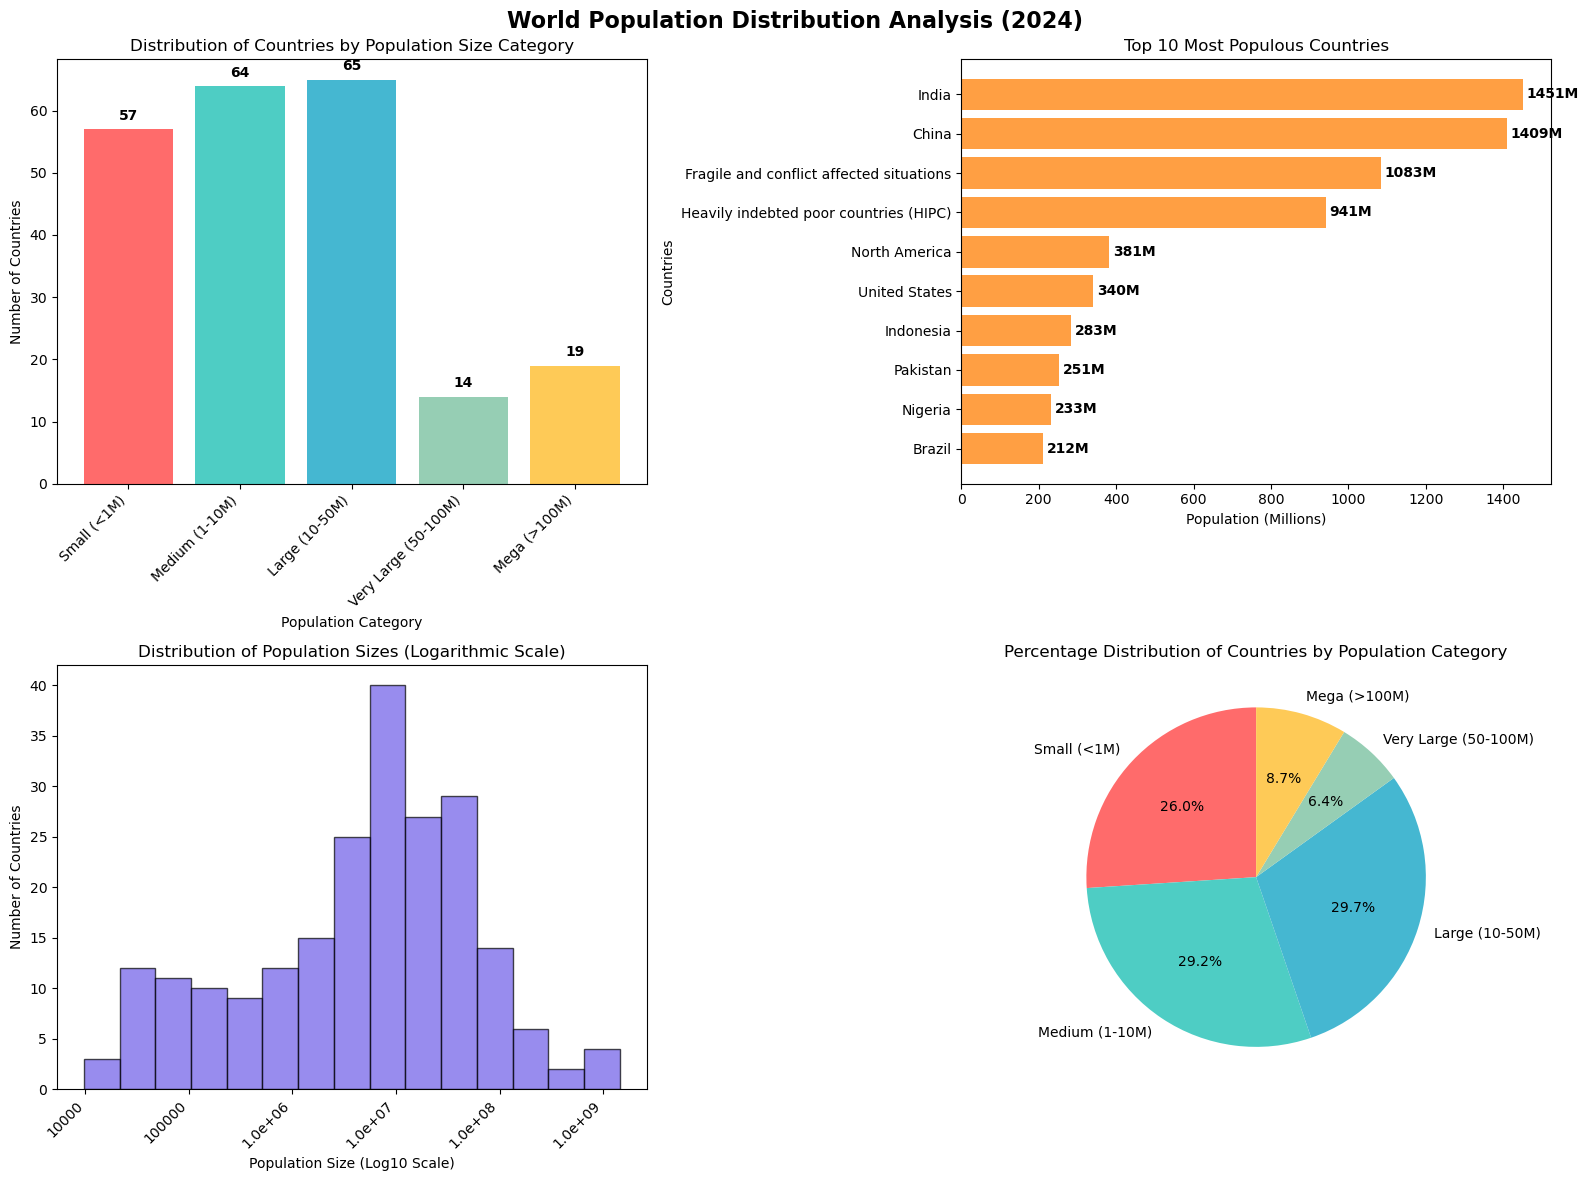

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def load_and_process_data(file_path):
    # Load World Bank population data Excel file (skip header rows)
    df = pd.read_excel(file_path, skiprows=3)
    most_recent_year = '2024'
    df_current = df[['Country Name', 'Country Code', most_recent_year]].copy()
    df_current = df_current.dropna()
    df_current.columns = ['Country', 'Code', 'Population']
    return df_current

def separate_countries_from_aggregates(df):
    # Separate individual countries from regional/income aggregates using patterns
    aggregate_patterns = [
        'World', 'Africa', 'Asia', 'Europe', 'America', 'Caribbean', 'Pacific',
        'income', 'IBRD', 'IDA', 'OECD', 'dividend', 'developed', 'Arab World',
        'Euro area', 'European Union', 'total', 'aggregate', 'group', 'classification'
    ]
    def is_aggregate(country_name):
        for pattern in aggregate_patterns:
            if pattern.lower() in country_name.lower() and pattern != 'America':
                return True
        return False
    df_countries = df[~df['Country'].apply(is_aggregate)].copy()
    return df_countries

def categorize_population(population):
    if population < 1e6:
        return 'Small (<1M)'
    elif population < 10e6:
        return 'Medium (1-10M)'
    elif population < 50e6:
        return 'Large (10-50M)'
    elif population < 100e6:
        return 'Very Large (50-100M)'
    else:
        return 'Mega (>100M)'

def create_population_visualizations(df_countries):
    plt.style.use('default')
    sns.set_palette("husl")

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('World Population Distribution Analysis (2024)', fontsize=16, fontweight='bold')

    # 1. Population Category Bar Chart
    df_countries['Population_Category'] = df_countries['Population'].apply(categorize_population)
    pop_category_counts = df_countries['Population_Category'].value_counts()
    category_order = ['Small (<1M)', 'Medium (1-10M)', 'Large (10-50M)', 'Very Large (50-100M)', 'Mega (>100M)']
    pop_category_counts = pop_category_counts.reindex(category_order)

    axes[0, 0].bar(range(len(pop_category_counts)), pop_category_counts.values,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57'])
    axes[0, 0].set_xlabel('Population Category')
    axes[0, 0].set_ylabel('Number of Countries')
    axes[0, 0].set_title('Distribution of Countries by Population Size Category')
    axes[0, 0].set_xticks(range(len(pop_category_counts)))
    axes[0, 0].set_xticklabels(pop_category_counts.index, rotation=45, ha='right')

    for i, v in enumerate(pop_category_counts.values):
        axes[0, 0].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

    # 2. Top 10 Most Populous Countries Horizontal Bar Chart
    top_countries = df_countries.nlargest(10, 'Population')
    top_countries['Population_Millions'] = top_countries['Population'] / 1e6

    axes[0, 1].barh(range(len(top_countries)), top_countries['Population_Millions'].values,
                    color='#FF9F43')
    axes[0, 1].set_xlabel('Population (Millions)')
    axes[0, 1].set_ylabel('Countries')
    axes[0, 1].set_title('Top 10 Most Populous Countries')
    axes[0, 1].set_yticks(range(len(top_countries)))
    axes[0, 1].set_yticklabels(top_countries['Country'].values)
    axes[0, 1].invert_yaxis()

    for i, v in enumerate(top_countries['Population_Millions'].values):
        axes[0, 1].text(v + 10, i, f'{v:.0f}M', va='center', fontweight='bold')

    # 3. Histogram - Population Size Distribution (Log Scale)
    populations = df_countries['Population'].values
    log_populations = np.log10(populations)

    axes[1, 0].hist(log_populations, bins=15, color='#6C5CE7', alpha=0.7, edgecolor='black')
    axes[1, 0].set_xlabel('Population Size (Log10 Scale)')
    axes[1, 0].set_ylabel('Number of Countries')
    axes[1, 0].set_title('Distribution of Population Sizes (Logarithmic Scale)')

    x_ticks = axes[1, 0].get_xticks()
    x_labels = [f'{10**x:.0f}' if x < 6 else f'{10**x:.1e}' for x in x_ticks]
    axes[1, 0].set_xticklabels(x_labels, rotation=45, ha='right')

    # 4. Pie Chart - Percentage Distribution of Population Categories
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
    axes[1, 1].pie(pop_category_counts.values, labels=pop_category_counts.index,
                   autopct='%1.1f%%', colors=colors, startangle=90)
    axes[1, 1].set_title('Percentage Distribution of Countries by Population Category')

    plt.tight_layout()
    plt.show()

def main():
    file_path = r"C:\Users\vishn\OneDrive\Desktop\population-distribution-viz\.venv\data\API_SP.POP.TOTL_DS2_en_excel_v2_363360.xls"
    try:
        print("Loading data...")
        df_raw = load_and_process_data(file_path)

        print("Separating individual countries from aggregates...")
        df_countries = separate_countries_from_aggregates(df_raw)

        print("Creating visualizations...")
        create_population_visualizations(df_countries)

    except FileNotFoundError:
        print(f"File not found: {file_path}\nPlease check that the path is correct.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    main()
